# Scraping Team Seas Data for analysis

In [26]:
import requests
import pandas
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import locale

In [27]:
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
headers = {"User-Agent": "Mozilla/5.0"}
# r = requests.get("https://teamseas.org/all-donors/", headers=headers)
r = requests.get("https://tscache.com/lb_recent.json")
# soup = BeautifulSoup(r.content, "html.parser")
donations = r.json()

In [28]:
donations.keys()

dict_keys(['recent', 'teams', 'most', 'config', 'teams_alpha', 'teams_most_donations'])

In [29]:
donations["recent"]

[{'ff': 0,
  'name': 'cuboids',
  'team_name': '',
  'message_public': 'Pale blue dot deserves a clean ocean',
  'flair': 'feed-icon-1.png',
  'pounds': '2',
  'pounds_color': 'FFB72B',
  'created_at': 1638469759,
  'is_gift': 1},
 {'ff': 0,
  'name': 'ips',
  'team_name': '',
  'message_public': 'plastic can***********',
  'flair': 'feed-icon-1.png',
  'pounds': '10',
  'pounds_color': 'FFB72B',
  'created_at': 1638469756,
  'is_gift': 0},
 {'ff': 0,
  'name': 'Bretondudgeon',
  'team_name': '',
  'message_public': '',
  'flair': 'feed-icon-1.png',
  'pounds': '6',
  'pounds_color': 'FFB72B',
  'created_at': 1638469727,
  'is_gift': 0},
 {'ff': 0,
  'name': 'White Jesus*',
  'team_name': '**********',
  'message_public': 'My bad done spelled my name wrong',
  'flair': 'feed-icon-1.png',
  'pounds': '1',
  'pounds_color': 'FFB72B',
  'created_at': 1638469678,
  'is_gift': 0},
 {'ff': 0,
  'name': 'Anonymous',
  'team_name': '',
  'message_public': '',
  'flair': 'feed-icon-1.png',
  'p

In [30]:
df_li = []
for recents in donations["recent"]:
    d = {}
    d["name"] = recents["name"]
    if recents["team_name"]:
        d["team_name"] = recents["team_name"]
    else:
        d["team_name"] = "Anonymous"
    d["created"] = datetime.strptime(datetime.utcfromtimestamp(int(recents["created_at"])).strftime('%Y-%m-%d %H:%M:%S'), '%Y-%m-%d %H:%M:%S')
    d["amount"] = locale.atoi(recents["pounds"])
    df_li.append(d)
df_li

[{'name': 'cuboids',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 29, 19),
  'amount': 2},
 {'name': 'ips',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 29, 16),
  'amount': 10},
 {'name': 'Bretondudgeon',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 28, 47),
  'amount': 6},
 {'name': 'White Jesus*',
  'team_name': '**********',
  'created': datetime.datetime(2021, 12, 2, 18, 27, 58),
  'amount': 1},
 {'name': 'Anonymous',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 26, 34),
  'amount': 5},
 {'name': 'Taliesin Driscoll',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 26, 4),
  'amount': 75},
 {'name': 'Sam',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 24, 40),
  'amount': 20},
 {'name': 'James Everard',
  'team_name': 'Anonymous',
  'created': datetime.datetime(2021, 12, 2, 18, 24, 19),
  'amount': 15},

In [31]:
df = pandas.DataFrame(df_li)
df["created"][0].strftime("%Y-%m-%d %H:%M:%S")

'2021-12-02 18:29:19'

## Plot of Donations vs Time

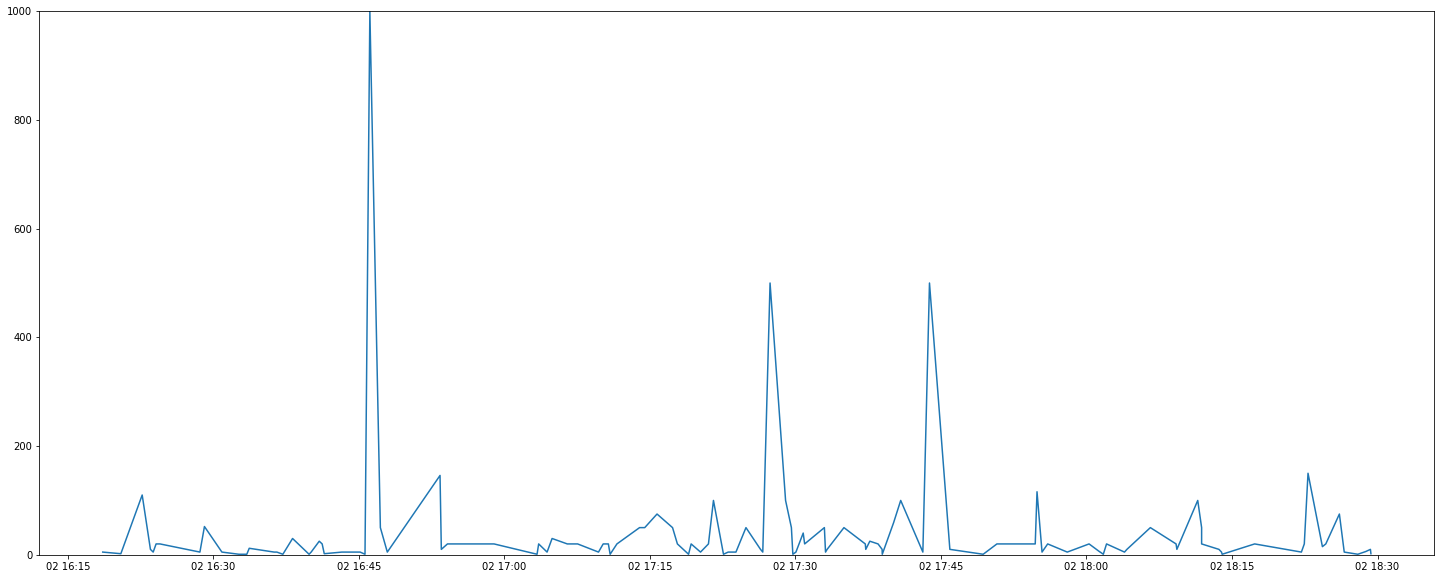

In [32]:
plt.figure(figsize=(25, 10))
# plt.yticks(range(min(df["amount"]), max(df["amount"])))
plt.ylim(0, df["amount"].max())
plt.plot(df["created"], df["amount"])

## Grouping according to teams

In [33]:
grouped_data = df.groupby(df["team_name"])["amount"].sum()
grouped_data

team_name
#KindlyWizards                31
**********                     1
5                              1
Alpha AF                      20
Anonymous                   3631
Aqua Fox                     100
Bearcat                       20
Charlie Brown Jr.              5
Fittime                        5
Harringtons                    5
Invalid Entry                 59
Lil Monki                    110
MalteseGoats                 100
Mammothdude                  120
Mason's Bar Mitzvah          100
Mikkel                        12
Mr. Beast                      5
MrBeast                       26
Ocean                         20
Power TakeOff                 50
Rollade                       20
Silly Sharks - Hard2fgur       5
Snowreyhs                      5
Team Doog!                     5
Team Simoni                   20
Team seas! ?                   5
Team whatever                 20
WATL WATL                     20
Wright Byrd                    5
Young Enterprise             146


In [34]:
teams_df = pandas.DataFrame({"team_name": grouped_data.index, "total_donated": grouped_data.values})
teams_df

,team_name,total_donated
0,#KindlyWizards,31
1,**********,1
2,5,1
3,Alpha AF,20
4,Anonymous,3631
5,Aqua Fox,100
6,Bearcat,20
7,Charlie Brown Jr.,5
8,Fittime,5
9,Harringtons,5


In [35]:
teams_df.sort_values(by=["total_donated"], ascending=False, inplace=True)

([<matplotlib.patches.Wedge at 0x25f59732ca0>,
 [Text(-0.8227269493641434, 0.7301509205568192, 'Anonymous'),
  Text(0.23599937303899424, -1.0743855434271263, 'Young Enterprise'),
  Text(0.4214589966123577, -1.016057239615222, 'Mammothdude'),
  Text(0.5714065650506251, -0.9399439012074315, 'Lil Monki'),
  Text(0.6967360957450766, -0.8512102048765087, 'Aqua Fox'),
  Text(0.8035069201717455, -0.751250044416715, "Mason's Bar Mitzvah"),
  Text(0.8960722451867402, -0.6380082533995894, 'MalteseGoats'),
  Text(0.9584286772010817, -0.539828186295033, 'Invalid Entry'),
  Text(0.9950229755958379, -0.4689661800560939, 'bearkat'),
  Text(1.023999381979151, -0.4017776321627634, 'Power TakeOff'),
  Text(1.0441541762600788, -0.3460376514176407, '#KindlyWizards'),
  Text(1.0565229744306344, -0.306201248364936, 'MrBeast'),
  Text(1.0653978292470172, -0.2737288173279236, 'Bearcat'),
  Text(1.0723043021900798, -0.24528245657740416, 'WATL WATL'),
  Text(1.0784513933235242, -0.21666239230320872, 'Team whate

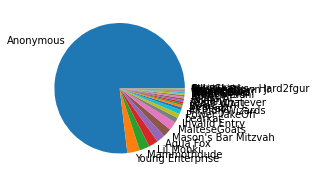

In [36]:
plt.figure(figsize=(25, 3))
plt.pie(teams_df["total_donated"], labels=teams_df["team_name"])

## Hourly Average

In [37]:
df["hour"] = df["created"].dt.strftime("%H")
df

,name,team_name,created,amount,hour
0,cuboids,Anonymous,2021-12-02 18:29:19,2,18
1,ips,Anonymous,2021-12-02 18:29:16,10,18
2,Bretondudgeon,Anonymous,2021-12-02 18:28:47,6,18
3,White Jesus*,**********,2021-12-02 18:27:58,1,18
4,Anonymous,Anonymous,2021-12-02 18:26:34,5,18
...,...,...,...,...,...
115,Anonymous,Anonymous,2021-12-02 16:23:48,5,16
116,Anonymous,Anonymous,2021-12-02 16:23:31,10,16
117,Lil Monki,Lil Monki,2021-12-02 16:22:40,110,16
118,SHJenkins,Anonymous,2021-12-02 16:20:28,2,16


In [38]:
hourly_grp = df.groupby(df["hour"])["amount"].sum()
hourly_grp

hour
16    1649
17    2412
18     661
Name: amount, dtype: int64

In [39]:
hourly_df = pandas.DataFrame({"hour": hourly_grp.index, "total_donation": hourly_grp.values })
hourly_df

,hour,total_donation
0,16,1649
1,17,2412
2,18,661


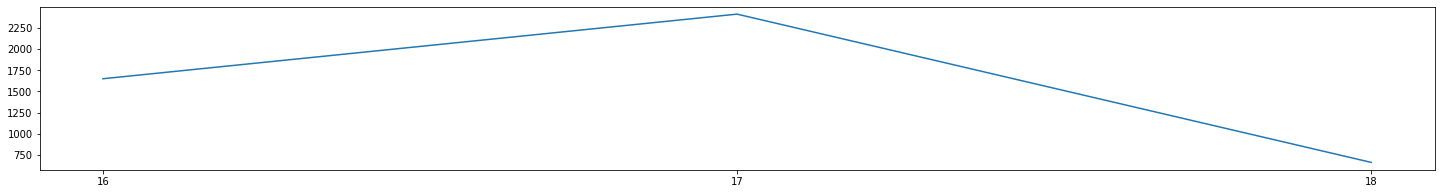

In [40]:
plt.figure(figsize=(25, 3))
plt.plot(hourly_df["hour"], hourly_df["total_donation"])

## Minute Average 

In [41]:
df["minute"] = df["created"].dt.strftime("%H-%M")
df

,name,team_name,created,amount,hour,minute
0,cuboids,Anonymous,2021-12-02 18:29:19,2,18,18-29
1,ips,Anonymous,2021-12-02 18:29:16,10,18,18-29
2,Bretondudgeon,Anonymous,2021-12-02 18:28:47,6,18,18-28
3,White Jesus*,**********,2021-12-02 18:27:58,1,18,18-27
4,Anonymous,Anonymous,2021-12-02 18:26:34,5,18,18-26
...,...,...,...,...,...,...
115,Anonymous,Anonymous,2021-12-02 16:23:48,5,16,16-23
116,Anonymous,Anonymous,2021-12-02 16:23:31,10,16,16-23
117,Lil Monki,Lil Monki,2021-12-02 16:22:40,110,16,16-22
118,SHJenkins,Anonymous,2021-12-02 16:20:28,2,16,16-20


In [42]:
minute_grp = df.groupby(df["minute"])["amount"].sum()
minute_grp

minute
16-18      5
16-20      2
16-22    110
16-23     15
16-24     40
        ... 
18-24     35
18-26     80
18-27      1
18-28      6
18-29     12
Name: amount, Length: 80, dtype: int64

In [43]:
minute_df = pandas.DataFrame({"minute": minute_grp.index, "total_donation": minute_grp.values})
minute_df

,minute,total_donation
0,16-18,5
1,16-20,2
2,16-22,110
3,16-23,15
4,16-24,40
...,...,...
75,18-24,35
76,18-26,80
77,18-27,1
78,18-28,6


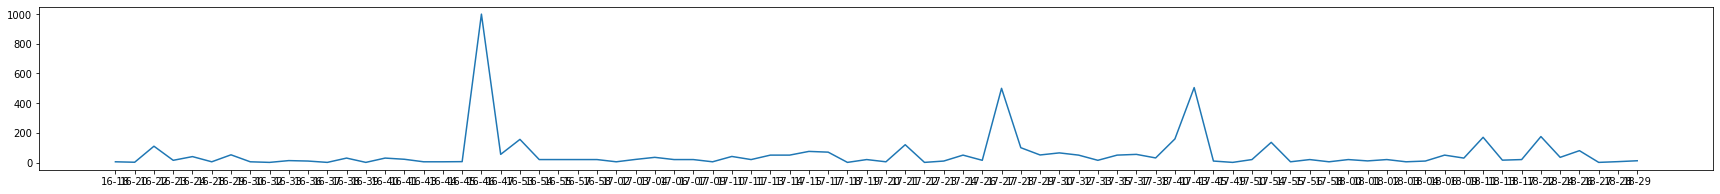

In [44]:
plt.figure(figsize=(30, 3))
plt.plot(minute_df["minute"], minute_df["total_donation"])